In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Bupa\Bupa_NL_5.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.0,27,31,NaN
1,85.0,64.0,NaN,32,23,0.0
2,86.0,54.0,33.0,16,54,0.0
3,91.0,78.0,34.0,24,36,NaN
4,98.0,55.0,13.0,17,17,0.0
...,...,...,...,...,...,...
340,91.0,54.0,25.0,22,35,4.0
341,89.0,48.0,32.0,22,14,4.0
342,85.0,52.0,22.0,23,34,4.0
343,95.0,93.0,21.0,27,47,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	17
float64		column 2	17
float64		column 3	34
int64		column 4	0
int64		column 5	0
float64		column 6	35


In [4]:

df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6
count,328.000000,328.000000,311.000000,345.000000,345.000000,310.000000
mean,90.179878,69.777439,30.218650,24.643478,38.284058,3.427419
std,4.375490,17.968606,18.597358,10.064494,39.254616,3.197702
min,65.000000,23.000000,5.000000,5.000000,5.000000,0.000000
25%,87.000000,57.000000,20.000000,19.000000,15.000000,0.500000
50%,90.000000,67.000000,26.000000,23.000000,25.000000,3.000000
75%,93.000000,79.000000,34.000000,27.000000,46.000000,5.750000
max,103.000000,138.000000,155.000000,82.000000,297.000000,20.000000


<AxesSubplot:>

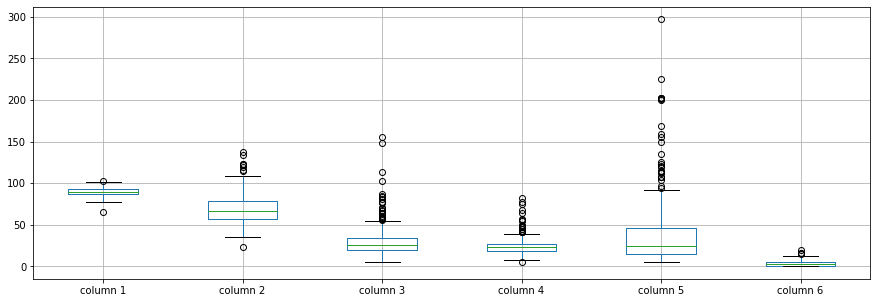

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    90.179878
column 2    69.777439
column 3    30.218650
column 4    24.643478
column 5    38.284058
column 6     3.427419
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6
column 1,1.000000,0.046401,0.174100,0.146974,0.198982,0.262576
column 2,0.046401,1.000000,0.097316,0.133674,0.142007,0.047637
column 3,0.174100,0.097316,1.000000,0.703033,0.502147,0.196669
column 4,0.146974,0.133674,0.703033,1.000000,0.527626,0.249239
column 5,0.198982,0.142007,0.502147,0.527626,1.000000,0.343068
column 6,0.262576,0.047637,0.196669,0.249239,0.343068,1.000000


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [6,6+32,6+32+32,6+32+32+32,6+32+32+32+32,6+32+32+32,6+32+32,6+32,6], vae_layer = False, seed = 320)
imputer.build_model(df)
imputer.train_model(training_epochs=32)


Size index: [6]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 266.7846483503069
Epoch: 1 , loss: 268.0738554454985
Epoch: 2 , loss: 269.11101786295575
Epoch: 3 , loss: 266.52864510672435
Epoch: 4 , loss: 268.0278051467169
Epoch: 5 , loss: 269.619867960612
Epoch: 6 , loss: 267.80262974330356
Epoch: 7 , loss: 268.2860107421875
Epoch: 8 , loss: 268.0320100330171
Epoch: 9 , loss: 269.0559438069661
Epoch: 10 , loss: 268.3856993175688
Epoch: 11 , loss: 269.4068799700056
Epoch: 12 , loss: 267.2076990036737
Epoch: 13 , loss: 268.5354258219401
Epoch: 14 , loss: 266.99837966192337
Epoch: 15 , loss: 267.9869610014416
Epoch: 16 , loss: 269.3628954206194
Epoch: 17 , loss: 266.7500537690662
Epoch: 18 , loss: 268.3958958217076
Epoch: 19 , loss: 269.05073910667784
Epoch: 20 , loss: 268.72337849934894
Epoch: 21 , loss: 268.7340523856027
Epoch: 22 , loss: 267.92003231956846
Epoch: 23 , loss: 267.7668784005301
Epoch: 24 , loss: 266.5101965041388
Epoch: 25 , loss: 269.1556890578497
E

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(345, 6)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    90.000000
column 2    47.000000
column 3    28.000000
column 4    15.000000
column 5    18.000000
column 6     0.047806
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Bupa.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6
0,0.0,0.0,0.000000,0,0,0.037335
1,0.0,0.0,-58.961872,0,0,0.000000
2,0.0,0.0,0.000000,0,0,0.000000
3,0.0,0.0,0.000000,0,0,0.054619
4,0.0,0.0,0.000000,0,0,0.000000
...,...,...,...,...,...,...
340,0.0,0.0,0.000000,0,0,0.000000
341,0.0,0.0,0.000000,0,0,0.000000
342,0.0,0.0,0.000000,0,0,0.000000
343,0.0,0.0,0.000000,0,0,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

542.7029699397818

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

2519.762091944396

In [18]:
NRMS=numerator/denominator
NRMS


0.2153786548638012

In [19]:
new_df.iloc[66,:]

column 1    86.0
column 2    54.0
column 3    20.0
column 4    21.0
column 5    16.0
column 6     2.0
Name: 66, dtype: float64

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6
0,85.0,92.0,45.000000,27,31,0.037335
1,85.0,64.0,0.038128,32,23,0.000000
2,86.0,54.0,33.000000,16,54,0.000000
3,91.0,78.0,34.000000,24,36,0.054619
4,98.0,55.0,13.000000,17,17,0.000000
...,...,...,...,...,...,...
340,91.0,54.0,25.000000,22,35,4.000000
341,89.0,48.0,32.000000,22,14,4.000000
342,85.0,52.0,22.000000,23,34,4.000000
343,95.0,93.0,21.000000,27,47,6.000000


In [21]:
imputations[-1].to_excel("Bupa_NL_5(imp).xlsx", index=False, header=False)